In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import *
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [192]:
#download S&P Data from past 5 years
df = web.DataReader('SPY', 'yahoo', start='2017-10-22', end='2022-10-25')

In [193]:
df = df.iloc[:-61]
df = df.pct_change() # get the returns
df.iloc[0] = 0

In [194]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-10-24,-0.002641,0.000508,-0.003418,0.001757,0.047259,0.001757
2017-10-25,-0.002025,-0.008393,-0.001637,-0.004950,0.549472,-0.004950
2017-10-26,-0.000039,0.005827,-0.000742,0.001293,-0.327023,0.001293
2017-10-27,0.006204,0.000587,0.001875,0.008176,0.225859,0.008176


# ANN Model

In [195]:
## ANN 1
input_layer = Input(shape=(5), dtype='float32')
dense1 = Dense(60, activation='linear')(input_layer)
dropout_layer = Dropout(0.2)(dense1)
output_layer = Dense(1, activation='linear')(dropout_layer)

ann1 = Model(inputs=input_layer, outputs=output_layer)
ann1.compile(loss='mean_squared_error', optimizer='adam')

## ANN 2
dense3 = Dense(60, activation='relu')(input_layer)
dense5 = Dense(60, activation='tanh')(dense3)
dropout_layer1 = Dropout(0.2)(dense5)
output_layer1 = Dense(1, activation='relu')(dropout_layer1)

ann2 = Model(inputs=input_layer, outputs=output_layer1)
ann2.compile(loss='mean_squared_error', optimizer='adam')

## ANN 3
dense6 = Dense(80, activation='sigmoid')(input_layer)
dense8 = Dense(80, activation='tanh')(dense6)
dropout_layer2 = Dropout(0.4)(dense8)
output_layer2 = Dense(1, activation='relu')(dropout_layer2)

ann3 = Model(inputs=input_layer, outputs=output_layer2)
ann3.compile(loss='mean_squared_error', optimizer='adam')

In [196]:
test_set_size = 0.2
valid_set_size= 0.2

df_copy = df.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, :5], df_train.iloc[:, 5]
X_valid, y_valid = df_valid.iloc[:, :5], df_valid.iloc[:, 5]
X_test, y_test = df_test.iloc[:, :5], df_test.iloc[:, 5]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (768, 5) (768,)
Shape of validation inputs, validation target: (192, 5) (192,)
Shape of test inputs, test target: (240, 5) (240,)


In [197]:
Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [198]:
## Training the ANNs

In [199]:
ann1.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=30, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)
ann2.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=30, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)
ann3.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=30, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)

Epoch 1/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0239 - val_loss: 0.0083
Epoch 2/30
154/154 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0059
Epoch 3/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 4/30
154/154 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 7/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 8/30
154/154 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/30
154/154 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 10/30
154/154 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 8.9209

In [200]:
y_pred = ann1.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)

y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test_rescaled, y_pred_rescaled)
print('R-squared score for ANN1:', round(score,4))

8/8 [==============================] - 0s 2ms/step
R-squared score for ANN1: 0.9921


In [206]:
y_pred2 = ann2.predict(X_test_scaled)
y_pred_rescaled2 = Target_scaler.inverse_transform(y_pred2)

score = r2_score(y_test_rescaled, y_pred_rescaled2)
print('R-squared score for ANN2:', round(score,4))

8/8 [==============================] - 0s 2ms/step
R-squared score for ANN2: 0.9889


In [207]:
y_pred3 = ann3.predict(X_test_scaled)
y_pred_rescaled3 = Target_scaler.inverse_transform(y_pred3)

score = r2_score(y_test_rescaled, y_pred_rescaled3)
print('R-squared score for ANN3:', round(score,4))

8/8 [==============================] - 0s 951us/step
R-squared score for ANN3: -9.683


In [213]:
mse_ann_1 = np.sum(np.power(y_test_rescaled-y_pred_rescaled,2))/len(y_test_rescaled)
print('MSE for ANN1 model:', mse_ann_1)
mse_ann_2 = np.sum(np.power(y_test_rescaled-y_pred_rescaled2,2))/len(y_test_rescaled)
print('MSE for ANN2 model:', mse_ann_2)
mse_ann_3 = np.sum(np.power(y_test_rescaled-y_pred_rescaled3,2))/len(y_test_rescaled)
print('MSE for ANN3 model:', mse_ann_3)

MSE for ANN1 model: 1.3566050391817845e-06
MSE for ANN2 model: 1.9057335515058575e-06
MSE for ANN3 model: 0.0018413447254808175


In [13]:
## ann1 is the best model

# LSTM Model

In [14]:
# clean the data

In [15]:
# only use the adj close column
adjclose = df.filter(['Adj Close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = adjclose.values

#split into 60% training, 20% validation, 20% testing
train_ind = int(len(adjclose)*.6)
val_ind = int(len(adjclose)*.2)

# Normalizing data before model fitting using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_adjclose = scaler.fit_transform(adjclose)

In [16]:
#train = target[:train_ind]
#val = target[train_ind-180:val_ind+train_ind]
#test = target[val_ind+train_ind-180:]

In [17]:
train = scaled_adjclose[:train_ind  , : ]

X_train = []
y_train = []
for i in range(90, len(train)):
    X_train.append(train[i-90:i, 0])
    y_train.append(train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)

Number of rows and columns:  (630, 90, 1)


In [18]:
val_data = scaled_adjclose[train_ind - 90:train_ind+val_ind  , : ]

X_val = []
y_val = []
for i in range(90, len(val_data)):
    X_val.append(val_data[i-90:i, 0])
    y_val.append(val_data[i, 0])

X_val, y_val = np.array(X_val), np.array(y_val) # converting into numpy sequences to train the LSTM model
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
print('Number of rows and columns: ', X_val.shape)

Number of rows and columns:  (240, 90, 1)


In [19]:
test = scaled_adjclose[train_ind + val_ind - 90: , : ]

X_test = []
y_test =  target[val_ind+train_ind: , : ]
for i in range(90,len(test)):
    X_test.append(test[i-90:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (240, 90, 1)


## First LSTM Model

In [20]:
lstm1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
lstm1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
lstm1.add(LSTM(units = 50, return_sequences = True))
lstm1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
lstm1.add(LSTM(units = 50, return_sequences = True))
lstm1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
lstm1.add(LSTM(units = 50))
lstm1.add(Dropout(0.2))
# Adding the output layer
lstm1.add(Dense(units = 1))

# Compiling the RNN
lstm1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
lstm1.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/5
20/20 [==============================] - 22s 459ms/step - loss: 0.0617 - val_loss: 0.0063
Epoch 2/5
20/20 [==============================] - 6s 292ms/step - loss: 0.0115 - val_loss: 0.0032
Epoch 3/5
20/20 [==============================] - 6s 289ms/step - loss: 0.0095 - val_loss: 0.0025
Epoch 4/5
20/20 [==============================] - 6s 278ms/step - loss: 0.0094 - val_loss: 0.0024
Epoch 5/5
20/20 [==============================] - 5s 272ms/step - loss: 0.0089 - val_loss: 0.0027


In [21]:
# predictions using the test dataset
adjclose_test = lstm1.predict(X_test)
adjclose_test = scaler.inverse_transform(adjclose_test)

8/8 [==============================] - 4s 86ms/step


In [22]:
# predictions using the validation dataset
adjclose_val = lstm1.predict(X_val)
adjclose_val = scaler.inverse_transform(adjclose_val)

8/8 [==============================] - 1s 84ms/step


In [23]:
train = adjclose[:train_ind]
val = adjclose[train_ind:val_ind+train_ind]
test = adjclose[val_ind+train_ind:]

C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


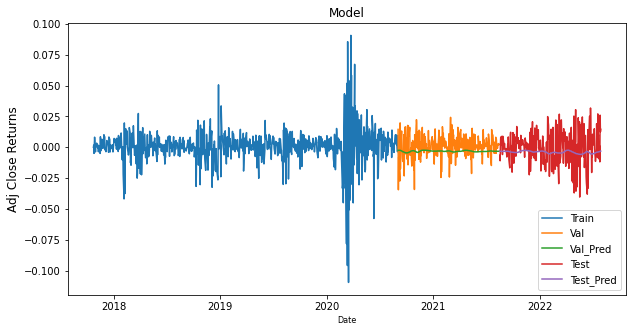

In [24]:
# Visualising the results
val.loc[:,1] = adjclose_val
val.rename(columns={1:'Pred'},inplace=True)
test.loc[:,1] = adjclose_test
test.rename(columns={1:'Pred'},inplace=True)

plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Adj Close Returns', fontsize=12)
plt.plot(train['Adj Close'])
plt.plot(val[['Adj Close', 'Pred']])
plt.plot(test[['Adj Close', 'Pred']])
plt.legend(['Train', 'Val', 'Val_Pred','Test','Test_Pred'], loc='lower right')
plt.show()

In [25]:
score = r2_score(test['Adj Close'], test['Pred'])
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: -0.0937


In [26]:
mse_lstm_1 = np.round(np.sum(np.power(test['Adj Close']-test['Pred'],2))/len(test),4)
print('MSE for LSTM 1 model:', mse_lstm_1)

MSE for LSTM 1 model: 0.0002


## Second LSTM Model

In [27]:
lstm2= Sequential()

#Adding the first LSTM layer and some Dropout regularisation
lstm2.add(LSTM(units = 65, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm2.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
lstm2.add(LSTM(units = 65, return_sequences = True))
lstm2.add(Dropout(0.1))

# Adding the output layer
lstm2.add(Dense(units = 1))

# Compiling the RNN
lstm2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
lstm2.fit(X_train, y_train, epochs = 30, batch_size = 16)

Epoch 1/5
40/40 [==============================] - 12s 109ms/step - loss: 0.0451
Epoch 2/5
40/40 [==============================] - 5s 119ms/step - loss: 0.0147
Epoch 3/5
40/40 [==============================] - 5s 118ms/step - loss: 0.0123
Epoch 4/5
40/40 [==============================] - 5s 113ms/step - loss: 0.0112
Epoch 5/5
40/40 [==============================] - 5s 114ms/step - loss: 0.0103


In [28]:
# predictions using the validation dataset
adjclose_val2 = lstm2.predict(X_val)
adjclose_val2 = scaler.inverse_transform(adjclose_val)

8/8 [==============================] - 2s 48ms/step


In [29]:
# predictions using the test dataset
adjclose_test2 = lstm2.predict(X_test)
adjclose_test2 = scaler.inverse_transform(adjclose_test)

8/8 [==============================] - 0s 54ms/step


C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


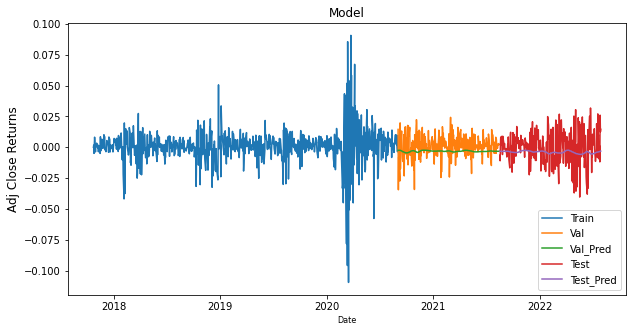

In [30]:
# Visualising the results
val.loc[:,2] = adjclose_val
val.rename(columns={2:'Pred2'},inplace=True)
test.loc[:,2] = adjclose_test
test.rename(columns={2:'Pred2'},inplace=True)

plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Adj Close Returns', fontsize=12)
plt.plot(train['Adj Close'])
plt.plot(val[['Adj Close', 'Pred2']])
plt.plot(test[['Adj Close', 'Pred2']])
plt.legend(['Train', 'Val', 'Val_Pred','Test','Test_Pred'], loc='lower right')
plt.show()

In [31]:
score = r2_score(test['Adj Close'], test['Pred2'])
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: -0.0937


In [32]:
mse_lstm_2 = np.sum(np.power(test['Adj Close']-test['Pred2'],2))/len(test)
print('MSE for LSTM 2 model:', np.round(mse_lstm_2,4))

MSE for LSTM 2 model: 0.0002


# CNN Model

In [33]:
train = df[:train_ind]
val = df[train_ind-10: val_ind+train_ind]
test = df[val_ind+train_ind-10:]

In [34]:
# Normalizing data before model fitting using MinMaxScaler
scaler_train = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler_train.fit_transform(train)

scaler_val = MinMaxScaler(feature_range=(0,1))
scaled_val = scaler_val.fit_transform(val)

scaler_test = MinMaxScaler(feature_range=(0,1))
scaled_test = scaler_test.fit_transform(test)

In [35]:
scaled_train = train.values

scaled_val = val.values

scaled_test = test.values

In [36]:
#train_0 = train.reshape(int(train.shape[0]/10),10,-1)
#train_0.shape

In [37]:
X_scaled_train = []
y_scaled_train = []
for i in range(10, len(scaled_train)):
    X_scaled_train.append(scaled_train[i-10:i, 0:4])
    y_scaled_train.append(scaled_train[i, -1])

X_train, y_train = np.array(X_scaled_train), np.array(y_scaled_train)
#X_scaled_train = np.reshape(X_scaled_train, (int(X_scaled_train.shape[0]/10), X_scaled_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)

Number of rows and columns:  (710, 10, 4)


In [38]:
X_scaled_val= []
y_scaled_val = []
for i in range(10, len(scaled_val)):
    X_scaled_val.append(scaled_val[i-10:i, 0:4])
    y_scaled_val.append(scaled_val[i, -1])

X_val, y_val = np.array(X_scaled_val), np.array(y_scaled_val)
#X_train = np.reshape(X_train, (int(X_train.shape[0]/10), X_train.shape[1], 1))
print('Number of rows and columns: ', X_val.shape)

Number of rows and columns:  (240, 10, 4)


In [39]:
X_scaled_test= []
y_scaled_test = []
for i in range(10, len(scaled_test)):
    X_scaled_test.append(scaled_test[i-10:i, 0:4])
    y_scaled_test.append(scaled_test[i, -1])

X_test, y_test = np.array(X_scaled_test), np.array(y_scaled_test)
#X_train = np.reshape(X_train, (int(X_train.shape[0]/10), X_train.shape[1], 1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (240, 10, 4)


In [40]:
## CNN 1
input_layer = Input(shape=((10,4,1)), dtype='float32')
dense1 = Conv2D(32, kernel_size = 3, activation='relu')(input_layer)
#dense2 = Conv2D(32, kernel_size = 3, activation='tanh')(dense1)
flat = Flatten()(dense1)
output_layer = Dense(1, activation='linear')(flat)

cnn1 = Model(inputs=input_layer, outputs=output_layer)
cnn1.compile(loss='mean_squared_error', optimizer='adam')

## CNN 2
input_layer2 = Input(shape=((10,4,1)), dtype='float32')
dense2 = Conv2D(64, kernel_size = 3, activation='tanh')(input_layer2)
flat2 = Flatten()(dense2)
output_layer2 = Dense(1, activation='sigmoid')(flat2)

cnn2 = Model(inputs=input_layer2, outputs=output_layer2)
cnn2.compile(loss='mean_squared_error', optimizer='adam')

## CNN 3
input_layer3 = Input(shape=((10,4,1)), dtype='float32')
dense3 = Conv2D(16, kernel_size = 3, activation='tanh')(input_layer3)
flat3 = Flatten()(dense3)
output_layer3 = Dense(1, activation='sigmoid')(flat3)

cnn3 = Model(inputs=input_layer3, outputs=output_layer3)
cnn3.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
cnn1.fit(x=X_train, y=y_train, batch_size=5, epochs=30, verbose=1, validation_data=(X_val, y_val), shuffle=True)
cnn2.fit(x=X_train, y=y_train, batch_size=5, epochs=30, verbose=1, validation_data=(X_val, y_val), shuffle=True)
cnn3.fit(x=X_train, y=y_train, batch_size=5, epochs=30, verbose=1, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/30
142/142 [==============================] - 1s 4ms/step - loss: 2.0962e-04 - val_loss: 8.8096e-05
Epoch 2/30
142/142 [==============================] - 0s 3ms/step - loss: 1.8999e-04 - val_loss: 9.3338e-05
Epoch 3/30
142/142 [==============================] - 0s 3ms/step - loss: 1.7285e-04 - val_loss: 9.6207e-05
Epoch 4/30
142/142 [==============================] - 1s 4ms/step - loss: 1.6734e-04 - val_loss: 8.9584e-05
Epoch 5/30
142/142 [==============================] - 0s 3ms/step - loss: 1.6624e-04 - val_loss: 9.3245e-05
Epoch 6/30
142/142 [==============================] - 1s 4ms/step - loss: 1.6021e-04 - val_loss: 9.5193e-05
Epoch 7/30
142/142 [==============================] - 1s 4ms/step - loss: 1.5256e-04 - val_loss: 9.0807e-05
Epoch 8/30
142/142 [==============================] - 1s 4ms/step - loss: 1.4690e-04 - val_loss: 8.6006e-05
Epoch 9/30
142/142 [==============================] - 0s 3ms/step - loss: 1.4459e-04 - val_loss: 8.8155e-05
Epoch 10/30
142/142 [=======

In [189]:
cnn_y_pred1 = cnn1.predict(X_test)
cnn_y_pred2 = cnn2.predict(X_test)
cnn_y_pred3 = cnn3.predict(X_test)
#y_pred1_rescaled = scaler_test.inverse_transform(y_pred1)

#y_test_rescaled =  scaler_test.inverse_transform(y_test)
score1 = r2_score(y_test, cnn_y_pred1)
score2 = r2_score(y_test, cnn_y_pred2)
score3 = r2_score(y_test, cnn_y_pred3)
print('R-squared score for the CNN1:', round(score1,4))
print('R-squared score for the CNN2:', round(score2,4))
print('R-squared score for the CNN3:', round(score3,4))

mse_cnn_1 = np.sum(np.power(y_test-cnn_y_pred1,2))/len(y_test)
mse_cnn_2 = np.sum(np.power(y_test-cnn_y_pred2,2))/len(y_test)
mse_cnn_3 = np.sum(np.power(y_test-cnn_y_pred3,2))/len(y_test)
print('MSE for CNN1 model:', np.round(mse_cnn_1,4))
print('MSE for CNN2 model:', np.round(mse_cnn_2,4))
print('MSE for CNN3 model:', np.round(mse_cnn_3,4))

8/8 [==============================] - 0s 2ms/step
R-squared score for the CNN1: -0.1627
R-squared score for the CNN2: -0.0104
R-squared score for the CNN3: -0.0229
MSE for CNN1 model: 0.0469
MSE for CNN2 model: 0.0418
MSE for CNN3 model: 0.0423


# ARMA Model

In [86]:
train = df[:train_ind]
test = df[train_ind:]

In [108]:
ARMA1 = ARIMA(train['Adj Close'], order=(5,0,5)) # ARIMA model with d=0 is an ARMA model
fitted1 = ARMA1.fit()
#print(fitted1.summary())

ARMA2 = ARIMA(train['Adj Close'], order=(10,0,10)) # ARIMA model with d=0 is an ARMA model
fitted2 = ARMA2.fit()

ARMA3 = ARIMA(train['Adj Close'], order=(16,0,2)) # ARIMA model with d=0 is an ARMA model
fitted3 = ARMA3.fit()

C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

In [109]:
fc1 = fitted1.forecast(len(test), alpha=0.05)
fc2 = fitted2.forecast(len(test), alpha=0.05)
fc3 = fitted3.forecast(len(test), alpha=0.05)

C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JackR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


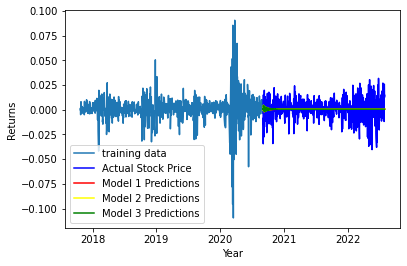

In [112]:
predictions = pd.DataFrame({'Adj Close':test['Adj Close'].values,'fc1':fc1.values,'fc2':fc2.values,'fc3':fc3.values}, index=test.index)

plt.plot(train['Adj Close'], label='training data')
plt.plot(test['Adj Close'], color = 'blue', label='Actual Stock Price')
plt.plot(predictions['fc1'], color = 'red',label='Model 1 Predictions')
plt.plot(predictions['fc2'], color = 'yellow',label='Model 2 Predictions')
plt.plot(predictions['fc3'], color = 'green',label='Model 3 Predictions')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [117]:
mse_arma1 = np.sum(np.power(predictions['Adj Close']-predictions['fc1'],2))/len(predictions)
mse_arma2 = np.sum(np.power(predictions['Adj Close']-predictions['fc2'],2))/len(predictions)
mse_arma3 = np.sum(np.power(predictions['Adj Close']-predictions['fc3'],2))/len(predictions)
print('MSE for ARMA 1 model:', np.round(mse_arma1,7))
print('MSE for ARMA 2 model:', np.round(mse_arma2,7))
print('MSE for ARMA 3 model:', np.round(mse_arma3,7))

MSE for ARMA 1 model: 0.0001304
MSE for ARMA 2 model: 0.0001306
MSE for ARMA 3 model: 0.0001307


In [118]:
# ARMA 1 is best

# Combine LSTM and CNN predictions

In [158]:
# LSTM 1 predictions (The best LSTM model)
best_lstm = adjclose_test.reshape(240,)

# CNN 2 predictions (The best CNN model)
best_cnn = y_pred2.reshape(240,)

# real returns
adj_close = df['Adj Close'][train_ind+val_ind:]
adj_close = adj_close.values

In [178]:
# create formula to optimize the MSE of the two predictions
def opt_predictions(alpha,x,y,z):
    return np.sum(np.power((alpha*x+(1-alpha)*y)-z,2))/len(x)

In [181]:
from scipy.optimize import minimize_scalar

# minimize a scaler to assign the optimal weights to each model predictions

res = minimize_scalar(opt_predictions,args=(best_lstm, best_cnn, adj_close),bounds=(0,1), method='bounded')

alpha = res.x

In [183]:
# reconstruct the predctions with the minimized weight
optimal_predictions = alpha*best_lstm + (1-alpha)*best_cnn

In [190]:
mse_lstm_cnn = np.sum(np.power(adj_close-optimal_predictions,2))/len(adj_close)

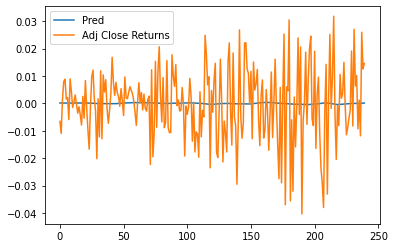

In [187]:
plt.plot(optimal_predictions)
plt.plot(adj_close)
plt.legend(['Pred','Adj Close Returns'])
plt.show()

# Compare MSEs from all Models

In [230]:
print('MSE ANN1:', mse_ann_1, '**')
print('MSE ANN2:', mse_ann_2)
print('MSE ANN3:', mse_ann_3)

print('MSE LSTM1:', mse_lstm_1)
print('MSE LSTM2:', mse_lstm_2)

print('MSE CNN1:', mse_cnn_1)
print('MSE CNN2:', mse_cnn_2)
print('MSE CNN3:', mse_cnn_3)

print('MSE ARMA1:', mse_arma1)
print('MSE ARMA2:', mse_arma2)
print('MSE ARMA3:', mse_arma3)

print('MSE LSTM/CNN:', mse_lstm_cnn)
print('-'*50)
print('-'*50)
print(' ANN1 is the best performing model (smallest MSE)')
print('-'*50)
print('-'*50)

MSE ANN1: 1.3566050391817845e-06 **
MSE ANN2: 1.9057335515058575e-06
MSE ANN3: 0.0018413447254808175
MSE LSTM1: 0.0002
MSE LSTM2: 0.00018850704006628252
MSE CNN1: 0.046923569406082714
MSE CNN2: 0.0418116472042392
MSE CNN3: 0.042330669216065396
MSE ARMA1: 0.0001304353595550436
MSE ARMA2: 0.00013055248915818011
MSE ARMA3: 0.0001306839299327081
MSE LSTM/CNN: 0.00017275080980446797
--------------------------------------------------
--------------------------------------------------
 ANN1 is the best performing model (smallest MSE)
--------------------------------------------------
--------------------------------------------------
